---
<center><h1>Pré-traitement</h1></center>

---

## Sujet

Comme d'autres types de données, les données textuelles ne sont jamais propres. De plus, la plupart de nos méthodes (notamment d'apprentissage automatique) en aval n'acceptent que des données structurées d'une manière particulière. C'est pourquoi, avant d'utiliser des techniques et méthodes d'analyse de texte, nous devons toujours effectuer un certain niveau de prétraitement. Les données textuelles ont leur propre type de prétraitement. Durant les premières séances, nous allons couvrir les principales méthodes de prétraitement:

- Lecture de fichiers
- Tokénisation
- Segmentation des phrases
- Suppression de la ponctuation
- Suppression des espaces blancs
- Normalisation du texte
- Mots vides
- Racinisation/lématisation
- Étiquetage POS

## Compétences visées

- Découvrir les différentes formes que peuvent revétir un chatbot


## Lecture de fichiers

La première étape consiste à lire les fichiers contenant les données. Les types de fichiers les plus courants pour les données textuelles sont : `.txt`, `.csv`, `.json`, `.html` et `.xml`.

#### Lire les fichiers `.txt` 

Charger le fichier 'sowing-and-reaping.txt', que vous appelerez raw, en utilisant une bibliothèque intégrée de python.

- Combien de caractères y a-t-il dans `raw` ?
- Récupérer les 1000 premiers caractères de `raw` ?

In [1]:
raw = open('data/sowing-and-reaping.txt', 'r').read()
print('Nombre de caractère =', len(raw))
print('1000 premiers caractères raw[:1000] =', raw[:1000])


Nombre de caractère = 168756
1000 premiers caractères raw[:1000] = The Project Gutenberg eBook, Sowing and Reaping, by Frances Ellen Watkins
Harper, Edited by Frances Smith Foster


This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net





Title: Sowing and Reaping

Author: Frances Ellen Watkins Harper

Release Date: February 10, 2004  [eBook #11022]

Language: English

Character set encoding: US-ASCII


***START OF THE PROJECT GUTENBERG EBOOK SOWING AND REAPING***


E-text prepared by Juliet Sutherland, Andrea Ball, and the Project
Gutenberg Online Distributed Proofreading Team



Transcriber's Note: This document is the text of Sowing and Reaping.
                    Any bracketed notations such as [Text missing],
                    [?], and those inserting letters or other comments
       

Ecrivez votre réponse ici

Nombre de caractère = 168756

1000 premiers caractères : exécuter la partie python


#### Lire dans `.csv`

Charger le fichier 'trump-tweets.csv', que vous appelerez tweets, en utilisant la bibliothèque intégrée de python appelé csv. La lecture est effectué avec un encodage utf-8.

- Combien d'entrées y a-t-il dans `tweets` ?
- Quelle entrée est la ligne d'en-tête ?


In [2]:
import csv 

with open('data/trump-tweets.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    print("Nombre d'entrées = ", len(list(reader)))
    print("La ligne d'en-tête est l'entrée 0")


Nombre d'entrées =  7376
La ligne d'en-tête est l'entrée 0


Ecrivez votre réponse ici

Nombre d'entrées =  7376

La ligne d'en-tête est l'entrée 0

#### Lire les fichiers `.csv` avec `pandas`

`pandas` est une bibliothèque tierce qui rend le travail avec des données tabulaires beaucoup plus facile. Elle est recommandée pour lire un fichier `.csv`.

Lire le même fichier `.csv` avec pandas.

- Combien de tweets ?
- Qu'est-il arrivé à la ligne d'en-tête ?

In [3]:
import pandas as pd

dataFrame = pd.read_csv('data/trump-tweets.csv', encoding='utf-8')
print("Nombre de tweets = ", len(dataFrame))
print("La ligne d'en-tête n'est pas comptée dans le nombre de tweets comparé à la méthode précédente, mais il lui n'est rien arrivé")
print(dataFrame.columns)

Nombre de tweets =  7375
La ligne d'en-tête n'est pas comptée dans le nombre de tweets comparé à la méthode précédente, mais il lui n'est rien arrivé
Index(['Date', 'Time', 'Tweet_Text', 'Type', 'Media_Type', 'Hashtags',
       'Tweet_Id', 'Tweet_Url', 'twt_favourites_IS_THIS_LIKE_QUESTION_MARK',
       'Retweets', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')


Ecrivez votre réponse ici

Nombre de tweets =  7375

La ligne d'en-tête n'est pas comptée dans le nombre de tweets comparé à la méthode précédente

['Date', 'Time', 'Tweet_Text', 'Type', 'Media_Type', 'Hashtags',
       'Tweet_Id', 'Tweet_Url', 'twt_favourites_IS_THIS_LIKE_QUESTION_MARK',
       'Retweets', 'Unnamed: 10', 'Unnamed: 11']

Quelle colonne correpond au contenu des tweets? Afficher les 5 premiers tweets. 

In [4]:
print("La colonne correspondant au contenu des tweets est 'Tweet_text', troisième colonne")
print("Les 5 premiers tweets sont :")
print(dataFrame.head(5)['Tweet_Text'])

La colonne correspondant au contenu des tweets est 'Tweet_text', troisième colonne
Les 5 premiers tweets sont :
0    Today we express our deepest gratitude to all ...
1    Busy day planned in New York. Will soon be mak...
2    Love the fact that the small groups of protest...
3    Just had a very open and successful presidenti...
4    A fantastic day in D.C. Met with President Oba...
Name: Tweet_Text, dtype: object


La colonne correspondant au contenu des tweets est 'Tweet_text', troisième colonne

Les 5 premiers tweets sont :

-    Today we express our deepest gratitude to all ...
-    Busy day planned in New York. Will soon be mak...
-    Love the fact that the small groups of protest...
-    Just had a very open and successful presidenti...
-    A fantastic day in D.C. Met with President Oba...

#### Lecture de plusieurs fichiers

Souvent, nos données textuelles sont réparties sur plusieurs fichiers dans un dossier. Nous voulons être en mesure de les lire tous dans une seule variable.

Le dossier, dans notre cas, est appelé `harper`. 

Lire les fichiers de `harper` puis rassembler les contenus dans une seule variable. 

Quelle est le type de cette variable?

In [5]:
import os

dossier = "./data/harper"

harpers = ''
for fichier in os.listdir(dossier):
    # Fusionner les différents fichiers txt trouvé dans le dossier
    file = open(dossier + "/" + fichier, "r")
    harpers += file.read()
    file.close()
print("Type de la variable = ", type(harpers))

Type de la variable =  <class 'str'>


Le type de la variable est une string, c'est une simple concaténation du contenus de tous les fichiers .txt

### Défi 

Lisez tous les fichiers `.csv` du dossier `amazon`. Extrayez uniquement la colonne 'text' des DEUX PREMIERS fichiers et stockez-les tous dans une liste.


In [6]:
import os 
import pandas as pd

dossier = "./data/amazon"
n_files_to_read = 2
header = []  # initial value for header

contents = []
for i, file_name in enumerate(os.listdir(dossier)[:n_files_to_read]):
    file_path = os.path.join(dossier, file_name)
    if not header:
        df = pd.read_csv(file_path, encoding='utf-8')
        header = df.columns.tolist()
    else:
        df = pd.read_csv(file_path, encoding='utf-8', header=None, names=header)

    contents.append(df['Text'])

contents = pd.concat(contents).tolist()

print("Voici la colonne 'Text' des 2 premiers fichiers et stockée dans une liste")
print("Premier élément = ", contents[0])
print("Dernier élément = ", contents[-1])

Voici la colonne 'Text' des 2 premiers fichiers et stockée dans une liste
Premier élément =  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
Dernier élément =  I was expecting some "serious flavor" as it was advertised on the bag.. but compared to other jalapeno chips I've had, it's pretty bland. The ingredients list is short, which is a plus, and it's fairly low in sodium (160mg per 1oz serving) which is probably why I prefer this less, as I like saltier chips. Overall I'd say this is a good choice if you like a healthier version of a jalapeno chip.. but if you like strong flavor like I do, stick with Kettle brand jalapeno chips.


Voici la colonne 'Text' des 2 premiers fichiers et stockée dans une liste
- Premier élément =  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
- Dernier élément =  I was expecting some "serious flavor" as it was advertised on the bag.. but compared to other jalapeno chips I've had, it's pretty bland. The ingredients list is short, which is a plus, and it's fairly low in sodium (160mg per 1oz serving) which is probably why I prefer this less, as I like saltier chips. Overall I'd say this is a good choice if you like a healthier version of a jalapeno chip.. but if you like strong flavor like I do, stick with Kettle brand jalapeno chips.

## Tokénization par des espaces

Une fois que nous avons lu les données, l'étape suivante consiste souvent à les diviser en jeton ou token. Cette étape est appelée "tokénisation". 

Lire le fichier 'example1.txt' puis procéder à une tokénisation simple(le délimiteur entre tokens est le caractère espace.)

- Quels problèmes rencontrez-vous avec la tokénisation par les espaces ?
- Quel est le nombre d'occurences des tokens 'or', 'and' et 'Project'?

In [7]:
file = open("data/example1.txt", "r")
raws = file.read().split(" ")
print(raws)

print("Le problème avec la tokénisation par espaces est que les mots sont séparés par des espaces, mais pas par des ponctuations")
print("Exemple : 'Hello, world!' devient ['Hello,', 'world!']")
print("On retrouve donc des tokens qui ne sont pas des mots (ponctuations, virgules, points, etc.)")

print("Nombre occurences de 'or' = ", raws.count("or"))
print("Nombre occurences de 'and' = ", raws.count("and"))
print("Nombre occurences de 'Project' = ", raws.count("Project"))

['In', 'this', 'little', 'example,', "we're", 'going', 'to', 'see', 'some', 'of', 'the', 'problems', 'that', 'regularly', 'appear', 'in', 'tokenization.', 'Tokenization', 'may', 'seem', 'simple,', 'but', "it's", 'harder', 'than', 'it', 'first', 'appears.', 'Why', 'is', 'it', 'so', 'hard?', 'Punctuations,', 'contractions', '(like', "don't,", "won't", 'and', "would've)", 'get', 'in', 'the', 'way.', '\n']
Le problème avec la tokénisation par espaces est que les mots sont séparés par des espaces, mais pas par des ponctuations
Exemple : 'Hello, world!' devient ['Hello,', 'world!']
On retrouve donc des tokens qui ne sont pas des mots (ponctuations, virgules, points, etc.)
Nombre occurences de 'or' =  0
Nombre occurences de 'and' =  1
Nombre occurences de 'Project' =  0


Ecrivez votre réponse ici

Le problème avec la tokénisation par espaces est que les mots sont séparés par des espaces, mais pas par des ponctuations

Exemple : 'Hello, world!' devient ['Hello,', 'world!']

On retrouve donc des tokens qui ne sont pas des mots (ponctuations, virgules, points, etc.)

Nombre occurences de 'or' =  0

Nombre occurences de 'and' =  1

Nombre occurences de 'Project' =  0

#### Tokénisation par expression régulière

Effectuer une tokénisation par expression régulière en utilisant la bibliothèque re.

Quelles sont les différences entre les résultats des deux types de tokénisations?



In [8]:
import re

PATTERN = r'[^\w\s\']'


file = open("data/example1.txt", "r")
values = re.sub(PATTERN, '', file.read()).split()
print(values)

print("La différence avec la méthode précédente est que les tokens sont des mots (pas de ponctuations, virgules, points, etc.)")


['In', 'this', 'little', 'example', "we're", 'going', 'to', 'see', 'some', 'of', 'the', 'problems', 'that', 'regularly', 'appear', 'in', 'tokenization', 'Tokenization', 'may', 'seem', 'simple', 'but', "it's", 'harder', 'than', 'it', 'first', 'appears', 'Why', 'is', 'it', 'so', 'hard', 'Punctuations', 'contractions', 'like', "don't", "won't", 'and', "would've", 'get', 'in', 'the', 'way']
La différence avec la méthode précédente est que les tokens sont des mots (pas de ponctuations, virgules, points, etc.)


Ecrivez votre réponse ici

La différence avec la méthode précédente est que les tokens sont des mots (pas de ponctuations, virgules, points, etc.)

#### Tokénisation ave bibliothèque `nltk`

nltk en Python fournit un tokéniseur basé sur les expressions régulières (RegexpTokenizer). Il peut être utilisée pour tokeniser ou diviser une phrase sur la base d'une expression régulière fournie.

- Utiliser RegexpTokenizer en lui donnant en entrée une expression régulière (par exemple celle utilisée plus haut). 

nltk propose aussi le tokéniseur Treebank, basé aussi sur les expressions régulières. 

- Utiliser Treebank.

Quelles sont les différences entre les résultats des deux tokéniseurs? 

In [9]:
import nltk 

PATTERN = r'\w+'
file = open("data/example1.txt", "r")
text = file.read()
file.close()

regexpTokenizer = nltk.tokenize.RegexpTokenizer(PATTERN)
tokens = regexpTokenizer.tokenize(text)
print(tokens)

treebank = nltk.tokenize.treebank.TreebankWordTokenizer()
tokensTreebank = treebank.tokenize(text)
print(tokensTreebank)

print("La différence entre les deux méthodes est que la méthode TreebankWordTokenizer() conserve les apostrophes")

['In', 'this', 'little', 'example', 'we', 're', 'going', 'to', 'see', 'some', 'of', 'the', 'problems', 'that', 'regularly', 'appear', 'in', 'tokenization', 'Tokenization', 'may', 'seem', 'simple', 'but', 'it', 's', 'harder', 'than', 'it', 'first', 'appears', 'Why', 'is', 'it', 'so', 'hard', 'Punctuations', 'contractions', 'like', 'don', 't', 'won', 't', 'and', 'would', 've', 'get', 'in', 'the', 'way']
['In', 'this', 'little', 'example', ',', 'we', "'re", 'going', 'to', 'see', 'some', 'of', 'the', 'problems', 'that', 'regularly', 'appear', 'in', 'tokenization.', 'Tokenization', 'may', 'seem', 'simple', ',', 'but', 'it', "'s", 'harder', 'than', 'it', 'first', 'appears.', 'Why', 'is', 'it', 'so', 'hard', '?', 'Punctuations', ',', 'contractions', '(', 'like', 'do', "n't", ',', 'wo', "n't", 'and', 'would', "'ve", ')', 'get', 'in', 'the', 'way', '.']
La différence entre les deux méthodes est que la méthode TreebankWordTokenizer() conserve les apostrophes


La différence entre les deux méthodes est que la méthode TreebankWordTokenizer() conserve les apostrophes et met la ponctuation dans un token

### Défi

Deux tâches sont demandées

- Plus haut vous avez lu les fichiers de `harper` dont le contenu est stockée dans une variable. Tokenisez cette variable en utilisant une méthode de votre choix. Trouvez tous les tokens uniques puis triez les pour former un vocabulaire.

- Pour chacun des tokens uniques déterminez le nombre d'occurences. Puis triez les tokens par ordre décroissant en fonction du nombre d'occurences. Afficher dans un graphe la courbe dont l'ordonnée est le nombre d'occurences et les abscisses les indides des tokens uniques triés. Que constantez-vous? A quoi correspondent les 10 premiers tokens et les 10 derniers tokens?




Nombre de tokens uniques =  10070


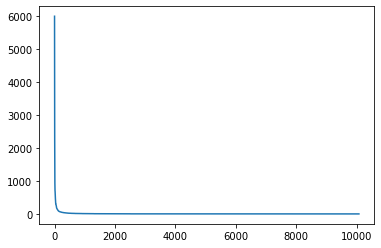

In [10]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

# tokenisation
tokens = nltk.tokenize.TreebankWordTokenizer().tokenize(harpers)
# trouver les tokens uniques
unique_tokens = list(set(tokens))
# trier les tokens uniques
unique_tokens = sorted(unique_tokens)

print("Nombre de tokens uniques = ", len(unique_tokens))

# compter le nombre d'occurrences de chaque token unique
token_counts = {t: tokens.count(t) for t in unique_tokens}
# trier les tokens par ordre décroissant de leur nombre d'occurrences
sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# tracer un graphique de la distribution des tokens
x = range(len(sorted_tokens))
y = [token_count[1] for token_count in sorted_tokens]
plt.plot(x, y)
plt.show()



In [11]:

print("10 premiers token + ", sorted_tokens[:10])
print("10 derniers token + ", sorted_tokens[-10:])

10 premiers token +  [(',', 6004), ('the', 3759), ('and', 3293), ('to', 2513), ('of', 2468), ("''", 2276), ('a', 1761), ('I', 1671), ('in', 1383), ('her', 1284)]
10 derniers token +  [('yield.', 1), ("you's", 1), ('young.', 1), ('younger', 1), ('yours.', 1), ('yourselves', 1), ('youth', 1), ('zephyrs', 1), ('zest', 1), ('ï»¿The', 1)]


- 10 premiers token +  [(',', 6004), ('the', 3759), ('and', 3293), ('to', 2513), ('of', 2468), ("''", 2276), ('a', 1761), ('I', 1671), ('in', 1383), ('her', 1284)]
- 10 derniers token +  [('yield.', 1), ("you's", 1), ('young.', 1), ('younger', 1), ('yours.', 1), ('yourselves', 1), ('youth', 1), ('zephyrs', 1), ('zest', 1), ('ï»¿The', 1)]

Les 10 premiers tokens sont des mots très courants, comme (the, a, and, ...), ainsi que de la ponctuation.

Les 10 derniers tokens sont des mots rares ou des erreurs de frappe, qui n'apparaissent qu'une ou deux fois dans le corpus.

## Segmentation de la phrase

La segmentation des phrases consiste à identifier les limites des phrases.

#### Segmentation de la phrase par découpage sur la ponctuation

Segmenter le fichier 'example1.txt', que vous avez déjà chargé plus haut, en phrases. Le délimiteur est le caractère '.'.

In [12]:
file = open("data/example1.txt", "r")
textExemple1 = file.read()
file.close()

print(textExemple1.split('.'))

["In this little example, we're going to see some of the problems that regularly appear in tokenization", " Tokenization may seem simple, but it's harder than it first appears", " Why is it so hard? Punctuations, contractions (like don't, won't and would've) get in the way", ' \n']


Nous pourrions améliorer cela en utilisant des expressions régulières. Elles nous permettront de diviser les chaînes de caractères en fonction d'un certain nombre de caractères.

Utiliser les délimiteurs '.', '?' et '!' via une expression régulière pour obtenir identifier des phrases.

In [13]:
import re

file = open("data/example1.txt", "r")
textExemple1 = file.read()
file.close()
sentences = re.split(r'[.!?]+[\s\n]+', textExemple1)
print(sentences)

["In this little example, we're going to see some of the problems that regularly appear in tokenization", "Tokenization may seem simple, but it's harder than it first appears", 'Why is it so hard', "Punctuations, contractions (like don't, won't and would've) get in the way", '']


Résultat : 

["In this little example, we're going to see some of the problems that regularly appear in tokenization", "Tokenization may seem simple, but it's harder than it first appears", 'Why is it so hard', "Punctuations, contractions (like don't, won't and would've) get in the way", '']

### Défi

Le fichier `exemple2.txt` a plus de problèmes de ponctuation. Lisez-le et voyez quels sont les problèmes. Faites de votre mieux pour modifier le code ci-dessus afin qu'il fonctionne dans le plus grand nombre de cas possible.

In [14]:
import re

file = open("data/example2.txt", "r")
textExemple2 = file.read()
file.close()
sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', textExemple2)
print(sentences)

# (?<!\w\.\w\.) : un lookbehind négatif qui exclut les abréviations telles que "Dr." ou "Mr." qui sont suivies d'un point et d'une lettre.
# (?<![A-Z][a-z]\.) : un autre lookbehind négatif qui exclut les abréviations telles que "Ms." ou "Mrs." qui commencent par une lettre majuscule suivie d'une lettre minuscule et d'un point.
# (?<=\.|\?)\s : une expression régulière qui correspond à un point ou à un point d'interrogation suivi d'un espace.

["In this little example, we're going to see some of the problems that regularly appear in tokenization.", "Tokenization may seem simple, but it's harder than it first appears.", 'Why is it so hard?', "Punctuations, contractions (like don't, won't, and would've) get in the way.", "\n\nWe can split text into sentences using punctuation, but unfortunately that's not always going to work.", "For example, if I wanted to tell you about Dr. Bailey, or Ms. Ndegeocello, we'd be in trouble.", 'What if I wanted to write about U.C. Berkeley?', 'When you think about it, URLs like www.google.com are troublesome too.', 'How would we settle on a price of $10.50?', 'The main point is that these punctuation characters serve a variety of purposes in writing.', 'Moreover, the functions they serve change depending on the domain (medical vs forum text) and language.']


#### Segmentation de phrases par `nltk`

Utiliser la méthode 'sent_tokenize' pour segmenter le fichier 'example1.txt' en phrases.

Quelles sont les différences entre cette méthode et les méthodes de segmentation en phrases utilisées précédement?

In [15]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize

file = open("data/example1.txt", "r")
text = file.read()
file.close()

sentences = sent_tokenize(text)

print(sentences)

["In this little example, we're going to see some of the problems that regularly appear in tokenization.", "Tokenization may seem simple, but it's harder than it first appears.", 'Why is it so hard?', "Punctuations, contractions (like don't, won't and would've) get in the way."]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Julien\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


La méthode sent_tokenize de la bibliothèque NLTK (Natural Language Toolkit) est un moyen plus sophistiqué pour segmenter un texte en phrases. Elle utilise des modèles statistiques pré-entrainés pour identifier les limites des phrases. Contrairement aux expressions régulières, elle est capable de gérer les abréviations et les acronymes courants.

Les méthodes utilisant les expressions régulières peuvent avoir des limitations lorsqu'il s'agit de traiter des textes complexes, notamment en présence d'abréviations, d'acronymes, ou de phrases longues et complexes.

## Suppression de la ponctuation

Parfois (bien que cela soit moins fréquent que pour la tokénisation et la segmentation en phrases), vous pouvez souhaiter ne conserver que les caractères alphanumériques (c'est-à-dire les lettres et les chiffres) et supprimer la ponctuation. 

La bibliothèque string propose une suite de ponctuations appelée 'punctuation'. Supprimer les ponctuations de 'punctuation' présentes dans le fichier 'example1.txt' déjà tokénisé.

In [26]:
import string
from nltk.tokenize import sent_tokenize, word_tokenize

# Supprimer la ponctuation de chaque phrase
sentences_without_punct = []
for sentence in sentences:
    tokens = word_tokenize(sentence)
    filtered_tokens = [token for token in tokens if token not in string.punctuation]
    sentences_without_punct.append(' '.join(filtered_tokens))

print(sentences_without_punct)

["In this little example we 're going to see some of the problems that regularly appear in tokenization", "Tokenization may seem simple but it 's harder than it first appears", 'Why is it so hard', "Punctuations contractions like do n't wo n't and would 've get in the way"]


Résultats : 

["In this little example we 're going to see some of the problems that regularly appear in tokenization", "Tokenization may seem simple but it 's harder than it first appears", 'Why is it so hard', "Punctuations contractions like do n't wo n't and would 've get in the way"]


## Suppression des espaces blancs

Il s'agit d'une étape extrêmement courante, particulièrement courante pour les textes saisis par l'utilisateur(pensez aux formulaires d'enquête). Elle est simple à réaliser et bien intégrée dans Python. 

Chargez le fichier 'example3.txt' et supprimer les espaces blancs en utilisant:
- la fonction strip()
- une expréssion régulière via la bibliothèque re 

In [17]:
import re

# Ouvrir le fichier
with open('data/example3.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Supprimer les espaces blancs avec la fonction strip()
text_stripped = text.strip()

# Supprimer les espaces blancs avec une expression régulière via la bibliothèque re
text_stripped_regex = re.sub(r'\s+', '', text)

# Afficher le texte original, le texte sans espaces blancs avec strip(), et le texte sans espaces blancs avec une expression régulière
print("\nTexte sans espaces blancs avec strip():\n", text_stripped)
print("\nTexte sans espaces blancs avec une expression régulière:\n", text_stripped_regex)



Texte sans espaces blancs avec strip():
 This is a text file that has some extra whitespace at the start and end. Whitespace is a catch-all term for spaces, tabs, newlines, and a bunch of other things that computers distinguish but to us all look like spaces, tabs and newlines.


The Python method called "strip" only catches whitespace at the start and end of a string. But it won't catch it in       the middle,		for example,

in this sentence.		Once again, regular expressions will

help		us    with this.

Texte sans espaces blancs avec une expression régulière:
 Thisisatextfilethathassomeextrawhitespaceatthestartandend.Whitespaceisacatch-alltermforspaces,tabs,newlines,andabunchofotherthingsthatcomputersdistinguishbuttousalllooklikespaces,tabsandnewlines.ThePythonmethodcalled"strip"onlycatcheswhitespaceatthestartandendofastring.Butitwon'tcatchitinthemiddle,forexample,inthissentence.Onceagain,regularexpressionswillhelpuswiththis.


## Normalisation du texte

La normalisation de texte consiste à faire correspondre notre texte à certains modèles standard. De nombreuses étapes entrent en jeu, mais les plus courantes sont les suivantes :

- passage en minuscule
- suppression des URL, des chiffres et des hashtags
- Suppression des mots inféquents

#### Passage en minuscule

Le passage en minuscules consiste en mettre les caractères en minuscules.

Charger le fichier 'example4.txt' puis le passage en minuscules.

In [18]:
import re

# Ouvrir le fichier
with open('data/example3.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Supprimer les espaces blancs avec la fonction strip()
text_lower = text.lower()

print(text_lower)



this is a text file that has some extra whitespace at the start and end. whitespace is a catch-all term for spaces, tabs, newlines, and a bunch of other things that computers distinguish but to us all look like spaces, tabs and newlines.


the python method called "strip" only catches whitespace at the start and end of a string. but it won't catch it in       the middle,		for example,

in this sentence.		once again, regular expressions will

help		us    with this.






### Défi 

Tokénisez le fichier 'example4.txt' puis appliquez à chacun des tokens le passage en minuscules.

In [19]:
import nltk
import matplotlib.pyplot as plt
import numpy as np

file = open("data/example4.txt", "r")
exemple4 = file.read()
file.close()

#Suppression des espaces
exemple4 = exemple4.strip()

#Passer en minuscule
exemple4 = exemple4.lower()

# tokenisation
tokens_ex4 = nltk.tokenize.TreebankWordTokenizer().tokenize(exemple4)

# trouver les tokens uniques
unique_tokens_ex4 = list(set(tokens_ex4))

# trier les tokens uniques
unique_tokens_ex4 = sorted(unique_tokens_ex4)

# compter le nombre d'occurrences de chaque token unique
token_counts_ex4 = {t: tokens_ex4.count(t) for t in unique_tokens_ex4}
# trier les tokens par ordre décroissant de leur nombre d'occurrences
sorted_tokens_ex4 = sorted(token_counts_ex4.items(), key=lambda x: x[1], reverse=True)


print(sorted_tokens_ex4)

[('case', 6), ('the', 4), ('and', 3), ('lower', 3), ('upper', 3), ('characters', 2), ('is', 2), ('we', 2), ('with', 2), ('.', 1), ('a', 1), ('annoying.', 1), ('are', 1), ('be', 1), ('can', 1), ('character', 1), ('characters.', 1), ('dealing', 1), ('every', 1), ('expression', 1), ('first', 1), ('folding', 1), ('for', 1), ('generic', 1), ('in', 1), ('individual', 1), ('letters', 1), ('multi-word', 1), ('numbers', 1), ('of', 1), ('often', 1), ('on', 1), ('page.', 1), ('people', 1), ('refers', 1), ('see', 1), ('term', 1), ('that', 1), ('title', 1), ('to', 1), ('use', 1), ('want.', 1), ('what', 1), ('word', 1)]


### Suppression des URL, des chiffres et des hashtags

Nous nous soucions rarement de l'URL exacte utilisée dans un tweet, ou du chiffre exact. Nous pourrions les supprimer complètement, mais il est souvent utile de savoir qu'il y a une URL ou un chiffre dans le texte. Nous voulons donc remplacer les URL et les chiffres individuels par un symbole qui préserve le fait qu'une URL était présente. Il est courant d'utiliser les chaînes de caractères "URL" et "DIGIT".

Ecrivez une expression régulière pour identifier des adresses url puis utiliser cette expression sur les tweets chargés plus haut pour remplacer les adresses par le mot "URL".

Effectuer la même opération pour les chiffres et les hashtags. Les mots de remplacement sont respectivement "DIGIT" et "HASHTAG".

In [27]:
import re

# Expression régulière pour identifier les URLs
url_regex = r'http\S+'

# Expression régulière pour identifier les chiffres
digit_regex = r'\d+'

# Expression régulière pour identifier les hashtags
hashtag_regex = r'#\w+'

# Fonction pour faire la subsititution
def replace_pattern_sub(pattern, repl, text):
    return re.sub(pattern, repl, text)

#### Mots peu fréquents

Parfois, il est préférable de supprimer les mots peu fréquents (parfois non !). Lorsque nous supprimons des mots peu fréquents, c'est souvent pour une méthode en aval (comme la classification) qui est sensible aux mots rares.

Reprenez les tweets que vous concatenerez. Puis appliquez les opérations précedentes sur les url, chiffres et hastags. Ensuite procédez à la tokénisation.



In [21]:
import pandas as pd

dataFrame = pd.read_csv('data/trump-tweets.csv', encoding='utf-8')
tweets = dataFrame['Tweet_Text'].tolist()

# concatener les tweets
tweets = ' '.join(tweets)

# replace url, chiffre et hashtag
tweets = replace_pattern_sub(url_regex, 'URL', tweets)
tweets = replace_pattern_sub(digit_regex, 'DIGIT', tweets)
tweets = replace_pattern_sub(hashtag_regex, 'HASHTAG', tweets)

# tokenisation
tweets_tokens = nltk.tokenize.TreebankWordTokenizer().tokenize(tweets)

print("Taille des tokens tweets =", len(tweets_tokens))
print(tweets_tokens)

Taille des tokens tweets = 154122
['Today', 'we', 'express', 'our', 'deepest', 'gratitude', 'to', 'all', 'those', 'who', 'have', 'served', 'in', 'our', 'armed', 'forces.', 'HASHTAG', 'URL', 'Busy', 'day', 'planned', 'in', 'New', 'York.', 'Will', 'soon', 'be', 'making', 'some', 'very', 'important', 'decisions', 'on', 'the', 'people', 'who', 'will', 'be', 'running', 'our', 'government', '!', 'Love', 'the', 'fact', 'that', 'the', 'small', 'groups', 'of', 'protesters', 'last', 'night', 'have', 'passion', 'for', 'our', 'great', 'country.', 'We', 'will', 'all', 'come', 'together', 'and', 'be', 'proud', '!', 'Just', 'had', 'a', 'very', 'open', 'and', 'successful', 'presidential', 'election.', 'Now', 'professional', 'protesters', ',', 'incited', 'by', 'the', 'media', ',', 'are', 'protesting.', 'Very', 'unfair', '!', 'A', 'fantastic', 'day', 'in', 'D.C.', 'Met', 'with', 'President', 'Obama', 'for', 'first', 'time.', 'Really', 'good', 'meeting', ',', 'great', 'chemistry.', 'Melania', 'liked', 'M

Calculez le nombre d'occurences de chaque toker en utilisant `Counter` de la la bibliothèque `collections`. Puis gardez que les tokens qui ont une occurence de plus de 1.

In [28]:
from collections import Counter

# Calculer le nombre d'occurrences de chaque token
tokens_count = Counter(tweets_tokens)
print("Taille des tokens tweets avant filtrage =", len(tokens_count))
# Garder seulement les tokens avec une occurrence supérieure à 1
tokens_filtered = [token for token, count in tokens_count.items() if count > 1]

print("Taille des tokens tweets apres filtrage =", len(tokens_filtered))
print(tokens_filtered)

Taille des tokens tweets avant filtrage = 15373
Taille des tokens tweets apres filtrage = 6380
['Today', 'we', 'express', 'our', 'deepest', 'gratitude', 'to', 'all', 'those', 'who', 'have', 'served', 'in', 'armed', 'HASHTAG', 'URL', 'day', 'planned', 'New', 'York.', 'Will', 'soon', 'be', 'making', 'some', 'very', 'important', 'decisions', 'on', 'the', 'people', 'will', 'running', 'government', '!', 'Love', 'fact', 'that', 'small', 'groups', 'of', 'protesters', 'last', 'night', 'passion', 'for', 'great', 'country.', 'We', 'come', 'together', 'and', 'proud', 'Just', 'had', 'a', 'open', 'successful', 'presidential', 'election.', 'Now', 'professional', ',', 'incited', 'by', 'media', 'are', 'Very', 'unfair', 'A', 'fantastic', 'D.C.', 'with', 'President', 'Obama', 'first', 'time.', 'Really', 'good', 'meeting', 'Melania', 'liked', 'Mrs.', 'O', 'lot', 'Happy', 'DIGITst', 'birthday', 'U.S.', 'Marine', 'Thank', 'you', 'your', 'service', 'Such', 'beautiful', 'evening', 'The', 'forgotten', 'man', 

Taille des tokens tweets avant filtrage = 15373

Taille des tokens tweets apres filtrage = 6380
